In [2]:
import numpy as np
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

from python_utils.signal_utils.signal_1d import Signal

# Data

## Notes
For $ M_{exercises} = 6 $, the external/internal rotation is used.

For $ M_{exercises} = 10 $, the external/internal rotation and MVIC force data are used.


### EMG
$ N_{subjects} \times M_{exercises} \times C_{locations} \times K_{samples} $
- N = 34, M = 10 (alphabetically sorted), C = 6, K = variable length
- Sampling frequency = 1000 Hz

### IMU
$ N_{subjects} \times M_{exercises} \times C_{locations} \times A_{IMU} \times K_{samples} $
- N = 34, M = 10 (alphabetically sorted), C = 6, A = 9, K = variable length
- Sampling frequency = 100 Hz

### PPG
$ N_{subjects} \times M_{exercises} \times K_{samples} $
- N = 34, M = 6 (alphabetically sorted), K = variable length
- Sampling frequency = 200 Hz

### Labels
$ N_{subjects} \times M_{exercises} \times K_{samples} $
- N = 34, M = 6 (alphabetically sorted), K = 20 (18 ratings + final rating + duration)
- Sampling frequency = 0.1 Hz

In [3]:
DATASET_BASE_PATH = Path("WSD4FEDSRM")
DATA_PATH = os.path.join(DATASET_BASE_PATH, "EMG, IMU, and PPG data")

In [4]:
N_SUBJECTS = 34

In [5]:
emg_data = [[] for _ in range(N_SUBJECTS)]
subdirs = os.listdir(DATA_PATH)
subdirs.sort()
for subdir in subdirs:
    for i in range(N_SUBJECTS):
        csvs = glob.glob(os.path.join(DATA_PATH, subdir, f"Subject {i+1}", "EMG data", "*.csv"))
        csvs.sort()
        _container = []
        for j, csv in enumerate(csvs):
            df = pd.read_csv(csv)
            _container.append(np.array(df["EMG(mV)"]))

        emg_data[i].append(_container)

In [6]:
emg_data_np = np.array(emg_data, dtype=object)

In [7]:
emg_data_np.shape

(34, 10, 6)

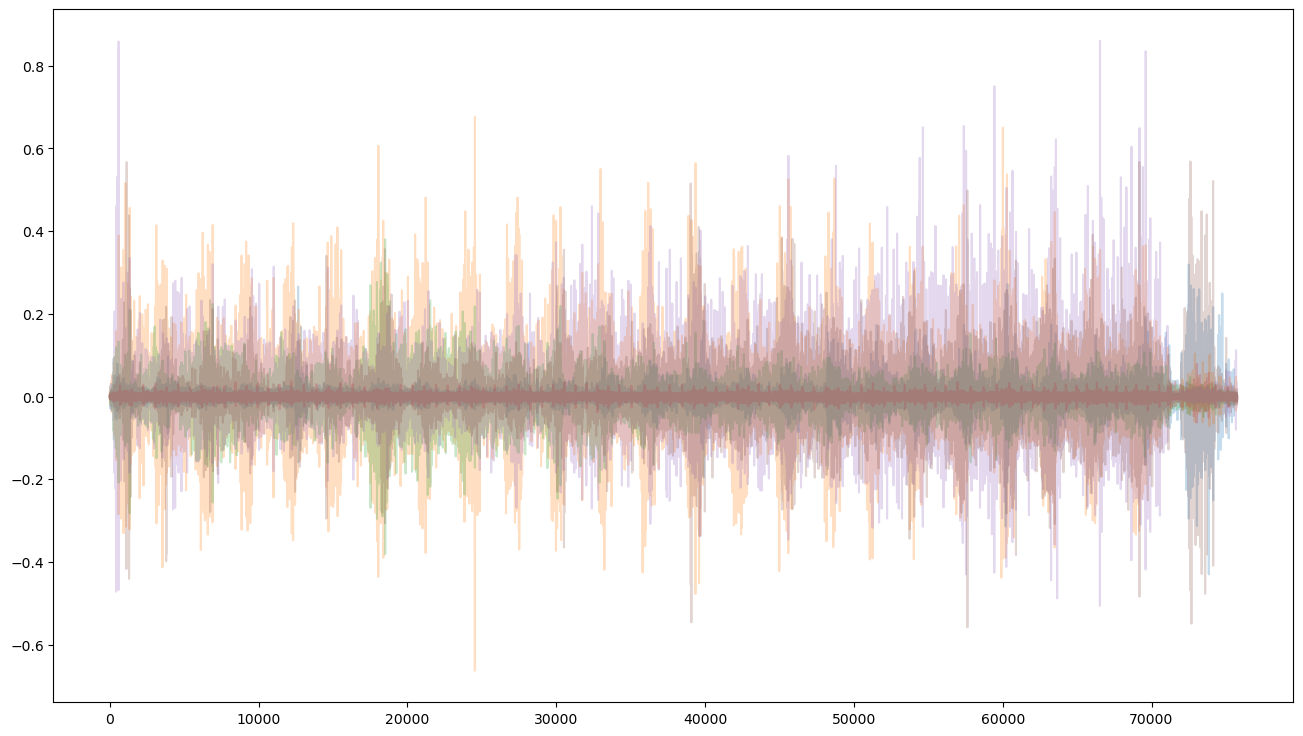

In [8]:
%matplotlib inline
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
for emg in emg_data_np[0][0]:
    ax.plot(emg, alpha = 0.25)

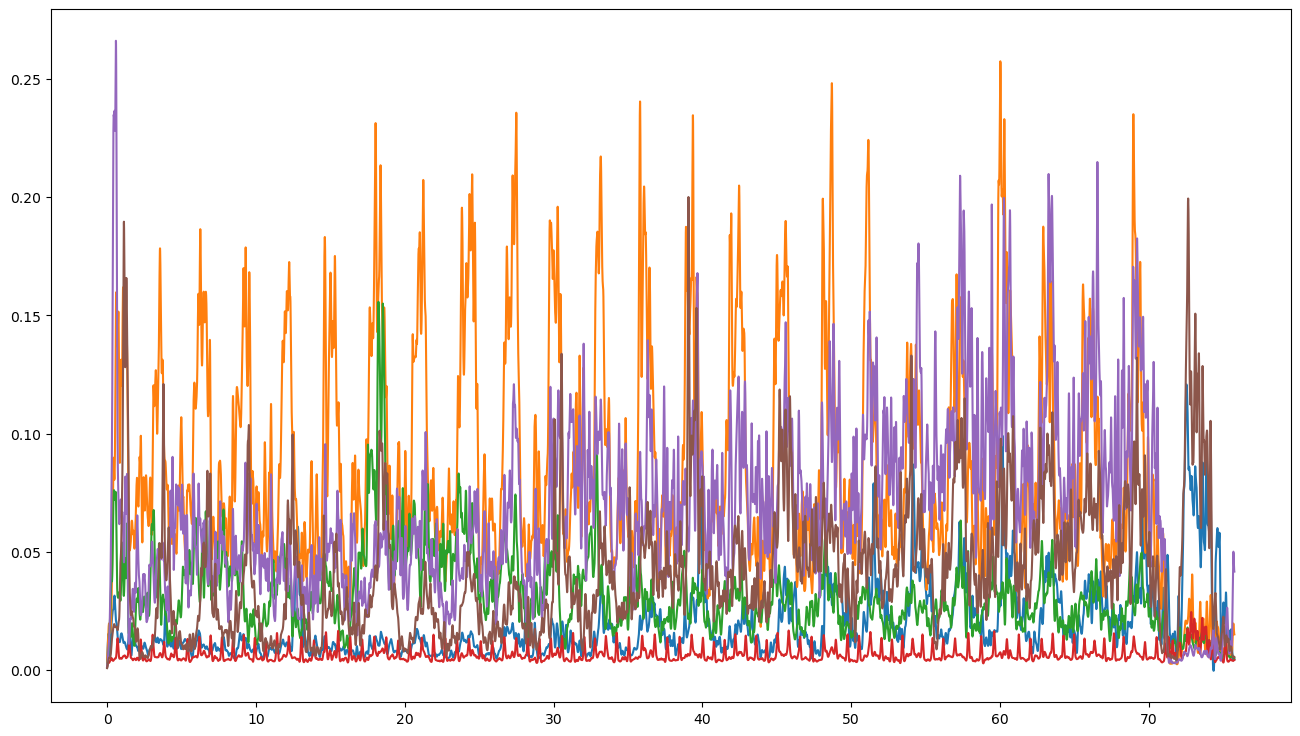

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

for emg in emg_data_np[0][0]:
    Signal(
        emg, 
        np.arange(0, emg.size/1000, 1/1000)
    ).compute_ffc(
        60.0
    ).as_absolute().compute_lowpass(
        f = 5.0, 
        order = 2
    ).plot_signal(ax, alpha = 1.0)

In [10]:
# # Filter the data
# filtered_data = np.zeros(emg_data_np.shape, dtype=object)
# for i in range(emg_data_np.shape[0]):
#     for j in range(emg_data_np.shape[1]):
#         for k in range(emg_data_np.shape[2]):
#             filtered_data[i][j][k] = Signal(emg_data_np[i][j][k], 
#                 np.arange(0, len(emg_data_np[i][j][k])/1000, 1/1000)
#             ).compute_ffc(
#                 60.0
#             ).as_absolute().compute_lowpass(
#                 f = 5.0, 
#                 order = 2
#             ).as_numpy

In [11]:
# %matplotlib inline
# fig = plt.figure(figsize=(16,9))
# ax = fig.add_subplot(111)
# for emg in filtered_data[0][0]:
#     ax.plot(emg, alpha = 1.0)

In [12]:
np.save("raw_emg_data", emg_data_np)

In [13]:
# del emg_data_np

In [14]:
# np.save("filtered_emg_data", filtered_data)

In [15]:
# del filtered_data

In [16]:
borg_data = pd.read_csv("WSD4FEDSRM/Borg data/borg_data.csv")
borg_data.head()

,subject,task_order,before_task,10_sec,20_sec,30_sec,40_sec,50_sec,60_sec,70_sec,...,180_sec,190_sec,200_sec,210_sec,220_sec,230_sec,240_sec,250_sec,end_of_trial,length_of_trial_(sec)
0,subject_1,task1_35i,6,9,10.0,11.0,13.0,15.0,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,105
1,NaN,task2_45i,6,9,10.0,11.0,13.0,16.0,18.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,76
2,NaN,task3_55i,6,11,12.0,14.0,16.0,18.0,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,70
3,NaN,task4_35e,6,9,10.0,13.0,15.0,18.0,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,70
4,NaN,task5_45e,6,11,14.0,17.0,19.0,19.0,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,64


In [17]:
borg_data["subject"] = borg_data["subject"].ffill()
borg_data.head()

,subject,task_order,before_task,10_sec,20_sec,30_sec,40_sec,50_sec,60_sec,70_sec,...,180_sec,190_sec,200_sec,210_sec,220_sec,230_sec,240_sec,250_sec,end_of_trial,length_of_trial_(sec)
0,subject_1,task1_35i,6,9,10.0,11.0,13.0,15.0,17.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,105
1,subject_1,task2_45i,6,9,10.0,11.0,13.0,16.0,18.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,76
2,subject_1,task3_55i,6,11,12.0,14.0,16.0,18.0,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,70
3,subject_1,task4_35e,6,9,10.0,13.0,15.0,18.0,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,70
4,subject_1,task5_45e,6,11,14.0,17.0,19.0,19.0,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,64


In [18]:
subdirs

['30-40_ external rotation',
 '30-40_ internal rotation',
 '40-50_ external rotation',
 '40-50_ internal rotation',
 '50-60_ external rotation',
 '50-60_ internal rotation',
 'MVIC force external rotation first',
 'MVIC force external rotation second',
 'MVIC force internal rotation first',
 'MVIC force internal rotation second']

In [19]:
borg_data.iloc[0][2:].to_numpy()

array([6, 9, 10.0, 11.0, 13.0, 15.0, 17.0, 18.0, 18.0, 19.0, 19.0, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, 20, 105], dtype=object)

In [20]:
borg_labels = [[[] for _ in range(6)] for _ in range(N_SUBJECTS)]
for i, subject in enumerate([f"subject_{i}" for i in range(1, N_SUBJECTS+1)]):
    df_filtered = borg_data[borg_data["subject"] == subject]
    for j, task in enumerate([
        "task4_35e", 
        "task1_35i", 
        "task5_45e",
        "task2_45i", 
        "task6_55e",
        "task3_55i"
    ]):
        borg_labels[i][j] = df_filtered[df_filtered["task_order"] == task].iloc[0].to_numpy()[2:]

In [21]:
borg_labels = np.array(borg_labels)
borg_labels

array([[[6, 9, 10.0, ..., nan, 20, 70],
        [6, 9, 10.0, ..., nan, 20, 105],
        [6, 11, 14.0, ..., nan, 20, 64],
        [6, 9, 10.0, ..., nan, 20, 76],
        [6, 11, 13.0, ..., nan, 20, 48],
        [6, 11, 12.0, ..., nan, 20, 70]],

       [[6, 7, 9.0, ..., nan, 20, 108],
        [6, 7, 8.0, ..., nan, 20, 163],
        [6, 8, 10.0, ..., nan, 20, 78],
        [6, 8, 10.0, ..., nan, 20, 98],
        [6, 8, 10.0, ..., nan, 20, 70],
        [6, 8, 11.0, ..., nan, 20, 76]],

       [[6, 8, 9.0, ..., nan, 20, 54],
        [6, 7, 8.0, ..., nan, 20, 180],
        [6, 11, 14.0, ..., nan, 20, 53],
        [6, 6, 10.0, ..., nan, 20, 120],
        [6, 7, 11.0, ..., nan, 20, 50],
        [6, 10, 12.0, ..., nan, 20, 90]],

       ...,

       [[6, 11, 14.0, ..., nan, 20, 48],
        [6, 12, 14.0, ..., nan, 20, 53],
        [6, 11, 15.0, ..., nan, 20, 43],
        [6, 12, 15.0, ..., nan, 20, 50],
        [6, 10, 14.0, ..., nan, 20, 38],
        [6, 10, 13.0, ..., nan, 20, 60]],

       

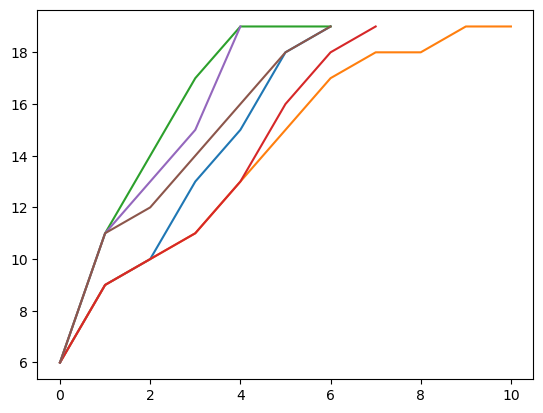

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
for label in borg_labels[0]:
    ax.plot(label[:-2])

In [23]:
np.save("fatigue_borg_labels", borg_labels)

In [24]:
del borg_labels

In [25]:
imu_data = [[[[] for _ in range(6)] for _ in range(10)] for _ in range(N_SUBJECTS)]
subdirs = os.listdir(DATA_PATH)
subdirs.sort()
for j, subdir in enumerate(subdirs):
    for i in range(N_SUBJECTS):
        subsubdirs = os.listdir(os.path.join(DATA_PATH, subdir, f"Subject {i+1}", "IMU data"))
        subsubdirs.sort()
        for k, subsubdir in enumerate(subsubdirs):   
            csvs = glob.glob(os.path.join(DATA_PATH, subdir, f"Subject {i+1}", "IMU data", subsubdir, "*.csv"))
            csvs.sort()
            
            df_accel = pd.read_csv(csvs[0])
            df_gyro = pd.read_csv(csvs[1])
            df_mag = pd.read_csv(csvs[2])
            
            # arr = np.array(
            #     [df_accel["acc_x(m/s^2)"], df_accel["acc_y(m/s^2)"], df_accel["acc_z(m/s^2)"],
            #     df_gyro["gyr_x(rad/s)"], df_gyro["gyr_y(rad/s)"], df_gyro["gyr_z(rad/s)"],
            #     df_mag["mag_x(a.u.)"], df_mag["mag_y(a.u.)"], df_mag["mag_z(a.u.)"]]
            # )

            # if len(imu_data[i][j]) > 1 and np.shape(imu_data[i][j][-1])[1] > np.shape(arr)[1]:
            #     na_arr = np.array([[np.nan]*9]*(np.shape(imu_data[i][j][-1])[1]-np.shape(arr)[1])).T
            #     # print(imu_data[i][j][-1].shape, arr.shape, na_arr.shape)
            #     arr = np.concatenate([arr, na_arr], axis=1)

            imu_data[i][j][k].append(df_accel["acc_x(m/s^2)"].to_numpy())
            imu_data[i][j][k].append(df_accel["acc_y(m/s^2)"].to_numpy())
            imu_data[i][j][k].append(df_accel["acc_z(m/s^2)"].to_numpy())
            imu_data[i][j][k].append(df_gyro["gyr_x(rad/s)"].to_numpy())
            imu_data[i][j][k].append(df_gyro["gyr_y(rad/s)"].to_numpy())
            imu_data[i][j][k].append(df_gyro["gyr_z(rad/s)"].to_numpy())
            imu_data[i][j][k].append(df_mag["mag_x(a.u.)"].to_numpy())
            imu_data[i][j][k].append(df_mag["mag_y(a.u.)"].to_numpy())
            imu_data[i][j][k].append(df_mag["mag_z(a.u.)"].to_numpy())

# for i in range(len(imu_data)):
#     for j in range(len(imu_data[i])):
#         for k in range(len(imu_data[i][j])):
#             if np.shape(imu_data[i][j][k])[1] < max_len:
#                 na_arr = np.array([[np.nan]*9]*(max_len-np.shape(imu_data[i][j][k])[1])).T
#                 imu_data[i][j][k] = np.concatenate([imu_data[i][j][k], na_arr], axis=1)

In [26]:
imu_data_np = np.array(imu_data, dtype=object)

In [27]:
imu_data_np.shape

(34, 10, 6, 9)

In [28]:
imu_data_np[0][0][0][0]

array([4.244755, 4.203697, 4.112003, ..., 9.826337, 9.759738, 9.807495])

In [29]:
ppg_data = [[] for _ in range(N_SUBJECTS)]
subdirs = os.listdir(DATA_PATH)
subdirs.sort()
for subdir in subdirs:
    for i in range(N_SUBJECTS):
        csvs = glob.glob(os.path.join(DATA_PATH, subdir, f"Subject {i+1}", "PPG data", "*.csv"))
        if len(csvs) == 0: continue
        csvs.sort()
        _container = []
        for j, csv in enumerate(csvs):
            df = pd.read_csv(csv)
            _container.append(np.array(df["PPG(Volt)"]))

        ppg_data[i].append(_container)

In [45]:
ppg_data_np = np.array(ppg_data, dtype=object)

In [46]:
ppg_data_np = ppg_data_np.reshape(ppg_data_np.shape[:-1])

In [31]:
np.save("raw_imu_data", imu_data_np)

In [48]:
np.save("raw_ppg_data", ppg_data_np)